In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.20/04


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.true.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.mergeFULL.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.mergeFULL.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.neutral.mergeFULL.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.ISRcut.mergeFULL.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.ISRcut.mergeFULL.root")


# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.cheat.root")



In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_cnt_nevents', 'h_mc_stable_nKaons_evt', 'h_mc_quark_cos', 'h_pfo_pv_kaon', 'h_pfo_pv_pion', 'h_pfo_pv_proton', 'h_pfo_neu_E', 'h_pfo_neu_p', 'h_pfo_neu_E_wrong', 'h_pfo_neu_p_wrong', 'h_pfo_neu_E_correct', 'h_pfo_neu_p_correct', 'h_pfo_kdEdx_dist_kaon', 'h_pfo_kdEdx_dist_proton', 'h_pfo_kdEdx_dist_pion', 'h_pfo_kdEdx_dist_electron', 'h_pfo_kdEdx_dist_muon', 'h_pfo_kdEdx_dist_others', 'h_pfo_pidEdx_dist_kaon', 'h_pfo_pidEdx_dist_proton', 'h_pfo_pidEdx_dist_pion', 'h_pfo_pidEdx_dist_electron', 'h_pfo_pidEdx_dist_muon', 'h_pfo_pidEdx_dist_others', 'h_pfo_pdEdx_dist_kaon', 'h_pfo_pdEdx_dist_proton', 'h_pfo_pdEdx_dist_pion', 'h_pfo_pdEdx_dist_electron', 'h_pfo_pdEdx_dist_muon', 'h_pfo_pdEdx_dist_others', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cos_kaon', 'h_pfo_LeadKaons_cos_proton', 'h_pfo_LeadKaons_cos_pion', 'h_pfo_LeadKaons_cos_electron', 'h_pfo_LeadKaons_cos_muon', 'h_pfo_LeadKaons_cos_others', 'h_pfo_QQ_cos_wrong', 'h_pfo_LeadKaons_cos_wrong', 'h_pfo_LeadKaons_cos_sep_wrong', 'h_p

In [6]:
h_cnt_nevents = file1.Get("h_cnt_nevents")

makePretty(h_cnt_nevents,kBlack)

In [7]:
c1 = TCanvas("c1","c1",500,500)

In [8]:
h_cnt_nevents.SetTitle(";Cut ID;nEvents");
gPad.SetLogy()
# h_cnt_nevents.GetXaxis().SetRangeUser(0,15)

h_cnt_nevents.Draw("h")

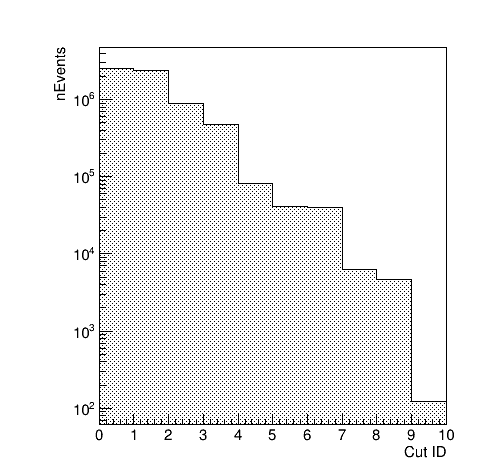

In [9]:
c1.Draw()

In [10]:
nbins = h_cnt_nevents.GetNbinsX()
for i in range(1,nbins+1):
    print('%i' % h_cnt_nevents.GetBinContent(i))

2515387
2387001
892694
473606
81217
41024
39365
6340
4637
122


## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```